Import Libraries and Initial Data Processing

In [1]:
import pandas as pd
from datetime import datetime, timedelta

# Convert 1-minute Bitcoin data to daily data
def convert_to_daily(df):
    df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')
    df = df.set_index('Timestamp')
    daily_df = df.resample('D').agg({
        'Open': 'mean', 'High': 'mean', 'Low': 'mean', 'Close': 'mean', 'Volume': 'sum'
    })
    return daily_df

try:
    # Read the 1-minute data
    bitcoin_df = pd.read_csv('btcusd_1-min_data.csv')
    # Convert to daily data
    daily_data = convert_to_daily(bitcoin_df)
    print(daily_data.head())
    # Save daily data to a new CSV
    daily_data.to_csv('bitcoin_daily.csv')
    print("Daily data saved to bitcoin_daily.csv")
except FileNotFoundError:
    print("btcusd_1-min_data.csv not found.")
except Exception as e:
    print(f"An error occurred: {e}")

                Open      High       Low     Close      Volume
Timestamp                                                     
2012-01-01  4.645697  4.645697  4.645697  4.645697   10.000000
2012-01-02  4.975000  4.975000  4.975000  4.975000   10.100000
2012-01-03  5.085500  5.085500  5.085500  5.085500  107.085281
2012-01-04  5.170250  5.170396  5.170250  5.170396  107.233260
2012-01-05  5.954292  5.954361  5.954292  5.954361   70.328742
Daily data saved to bitcoin_daily.csv


Load Daily Data and Define DCA Calculation Function

In [3]:
# Load the preprocessed daily data
df = pd.read_csv('bitcoin_daily.csv')
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

def calculate_dca(df, investment_amount, frequency_days, start_date, end_date):
    purchases = []
    current_date = start_date
    total_invested = 0
    total_btc = 0

    while current_date <= end_date:
        price_row = df[df['Timestamp'] <= current_date].iloc[-1]
        btc_bought = investment_amount / price_row['Close']
        total_invested += investment_amount
        total_btc += btc_bought
        
        purchases.append({
            'Date': current_date,
            'BTC_Bought': btc_bought,
            'Price': price_row['Close'],
            'Total_Invested': total_invested,
            'Total_BTC': total_btc
        })
        
        current_date += timedelta(days=frequency_days)

    final_price = df[df['Timestamp'] == end_date]['Close'].values[0]
    final_value = total_btc * final_price

    return pd.DataFrame(purchases), total_invested, total_btc, final_value

DCA Simulation and Results

In [8]:
# Parameters for DCA strategy
investment_amount = 100 # Dollar Amount
frequency_days = 14 # Purchase every X Days
start_date = datetime(2024, 1, 27) # Start 3 Years ago
end_date = datetime(2025, 1, 27)

# Run DCA simulation
purchases_df, total_invested, total_btc, final_value = calculate_dca(df, investment_amount, frequency_days, start_date, end_date)

# Calculate the total value of Bitcoin held
purchases_df['Total_Value'] = purchases_df['Total_BTC'] * purchases_df['Price']

# Output results
print(f"Total invested: ${total_invested:.2f}")
print(f"Total BTC bought: {total_btc:.8f}")
print(f"Final BTC value at {end_date.date()}: ${final_value:.2f}")
print(f"Return on Investment: {(final_value - total_invested) / total_invested * 100:.2f}%")

# Display purchases data
print(purchases_df)

# Export DCA results to CSV
purchases_df.to_csv('dca_results.csv', index=False)
print("DCA results saved to dca_results.csv")

Total invested: $2700.00
Total BTC bought: 0.04073994
Final BTC value at 2025-01-27: $4176.41
Return on Investment: 54.68%
         Date  BTC_Bought          Price  Total_Invested  Total_BTC  \
0  2024-01-27    0.002392   41805.281250             100   0.002392   
1  2024-02-10    0.002114   47308.683333             200   0.004506   
2  2024-02-24    0.001960   51024.063889             300   0.006466   
3  2024-03-09    0.001461   68464.370139             400   0.007926   
4  2024-03-23    0.001555   64301.992361             500   0.009481   
5  2024-04-06    0.001472   67916.527083             600   0.010954   
6  2024-04-20    0.001560   64096.196528             700   0.012514   
7  2024-05-04    0.001581   63261.094444             800   0.014095   
8  2024-05-18    0.001494   66947.722222             900   0.015588   
9  2024-06-01    0.001478   67651.296000            1000   0.017067   
10 2024-06-15    0.001512   66137.077083            1100   0.018579   
11 2024-06-29    0.001647

Dollar Cost Averaging: $100 Dollars every 2 weeks over 1 Year

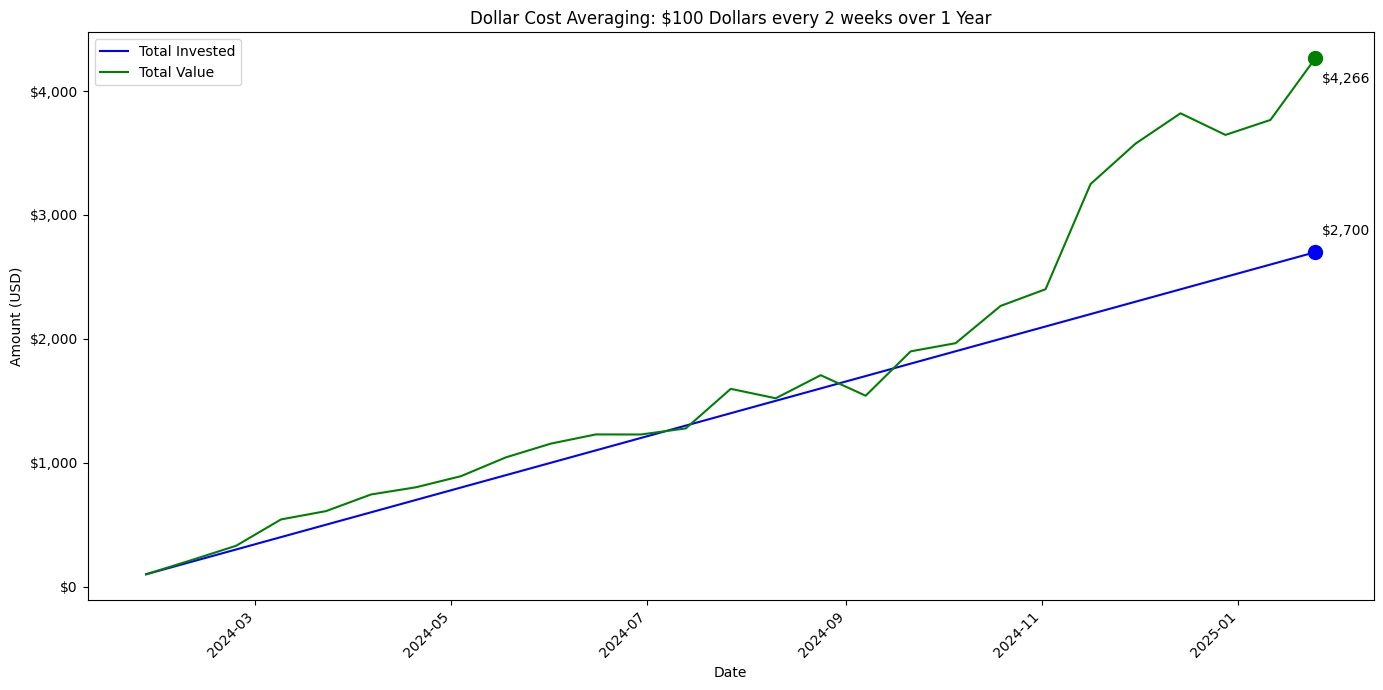

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your CSV file
df = pd.read_csv('1year-dca.csv')
df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' to datetime if not already

# Create the plot
plt.figure(figsize=(14, 7))

# Plot Total_Invested and Total_Value
plt.plot(df['Date'], df['Total_Invested'], label='Total Invested', color='blue')
plt.plot(df['Date'], df['Total_Value'], label='Total Value', color='green')

# Add labels and title
plt.title('Dollar Cost Averaging: $100 Dollars every 2 weeks over 1 Year')
plt.xlabel('Date')
plt.ylabel('Amount (USD)')
plt.legend()

# Format y-axis to show currency
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Rotate x-axis labels for better readability if dates are close together
plt.xticks(rotation=45, ha='right')

# Add markers and annotations at the end points
last_date = df['Date'].iloc[-1]
last_invested = df['Total_Invested'].iloc[-1]
last_value = df['Total_Value'].iloc[-1]

# Add markers
plt.plot(last_date, last_invested, 'bo', markersize=10)  # Blue dot for Total Invested
plt.plot(last_date, last_value, 'go', markersize=10)    # Green dot for Total Value

# Annotation for Total Invested
plt.annotate(f'${last_invested:,.0f}', 
             xy=(last_date, last_invested), 
             xytext=(5, 10), textcoords='offset points',
             ha='left', va='bottom')

# Annotation for Total Value
plt.annotate(f'${last_value:,.0f}', 
             xy=(last_date, last_value), 
             xytext=(5, -10), textcoords='offset points',
             ha='left', va='top')

# Adjust the plot layout
plt.tight_layout()
plt.show()

Dollar Cost Averaging: $100 Dollars every 2 weeks over 3 Years

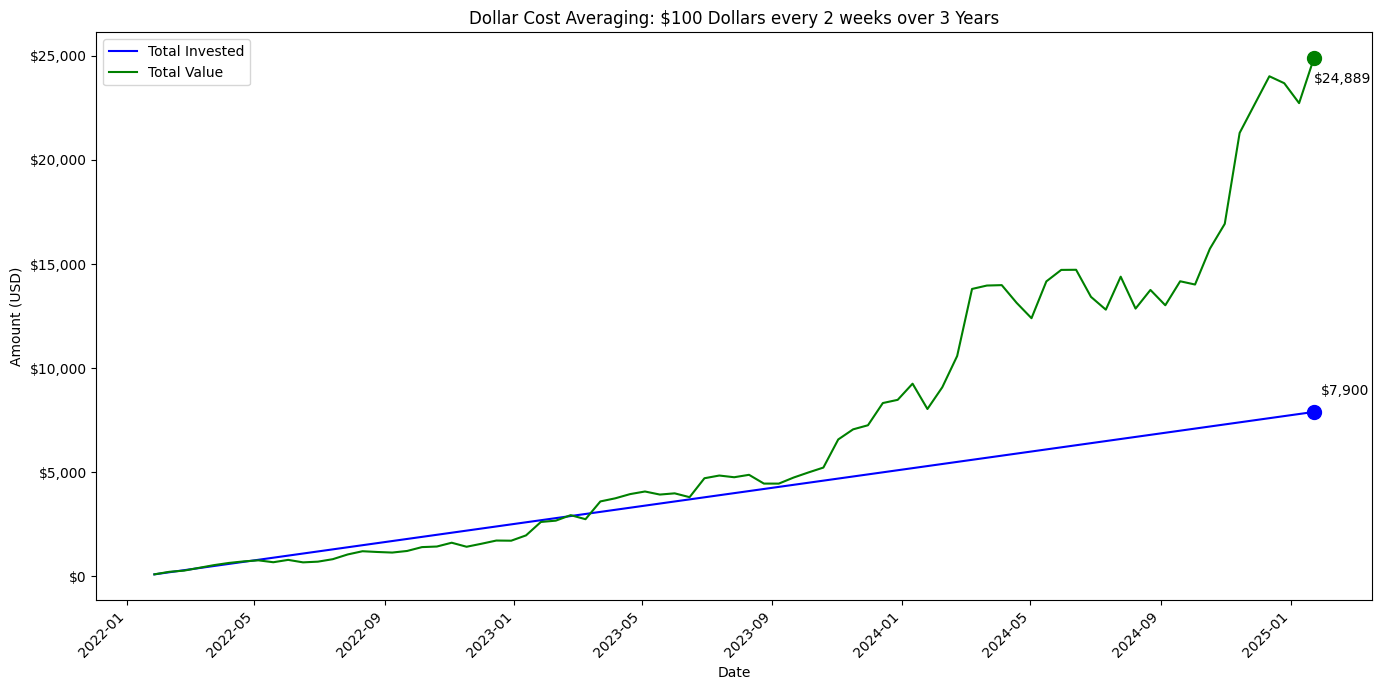

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your CSV file
df = pd.read_csv('3year-dca.csv')
df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' to datetime if not already

# Create the plot
plt.figure(figsize=(14, 7))

# Plot Total_Invested and Total_Value
plt.plot(df['Date'], df['Total_Invested'], label='Total Invested', color='blue')
plt.plot(df['Date'], df['Total_Value'], label='Total Value', color='green')

# Add labels and title
plt.title('Dollar Cost Averaging: $100 Dollars every 2 weeks over 3 Years')
plt.xlabel('Date')
plt.ylabel('Amount (USD)')
plt.legend()

# Format y-axis to show currency
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Rotate x-axis labels for better readability if dates are close together
plt.xticks(rotation=45, ha='right')

# Add markers and annotations at the end points
last_date = df['Date'].iloc[-1]
last_invested = df['Total_Invested'].iloc[-1]
last_value = df['Total_Value'].iloc[-1]

# Add markers
plt.plot(last_date, last_invested, 'bo', markersize=10)  # Blue dot for Total Invested
plt.plot(last_date, last_value, 'go', markersize=10)    # Green dot for Total Value

# Annotation for Total Invested
plt.annotate(f'${last_invested:,.0f}', 
             xy=(last_date, last_invested), 
             xytext=(5, 10), textcoords='offset points',
             ha='left', va='bottom')

# Annotation for Total Value
plt.annotate(f'${last_value:,.0f}', 
             xy=(last_date, last_value), 
             xytext=(0, -10), textcoords='offset points',
             ha='left', va='top')

# Adjust the plot layout
plt.tight_layout()
plt.show()

Dollar Cost Averaging: $100 Dollars every 2 weeks over 5 Years

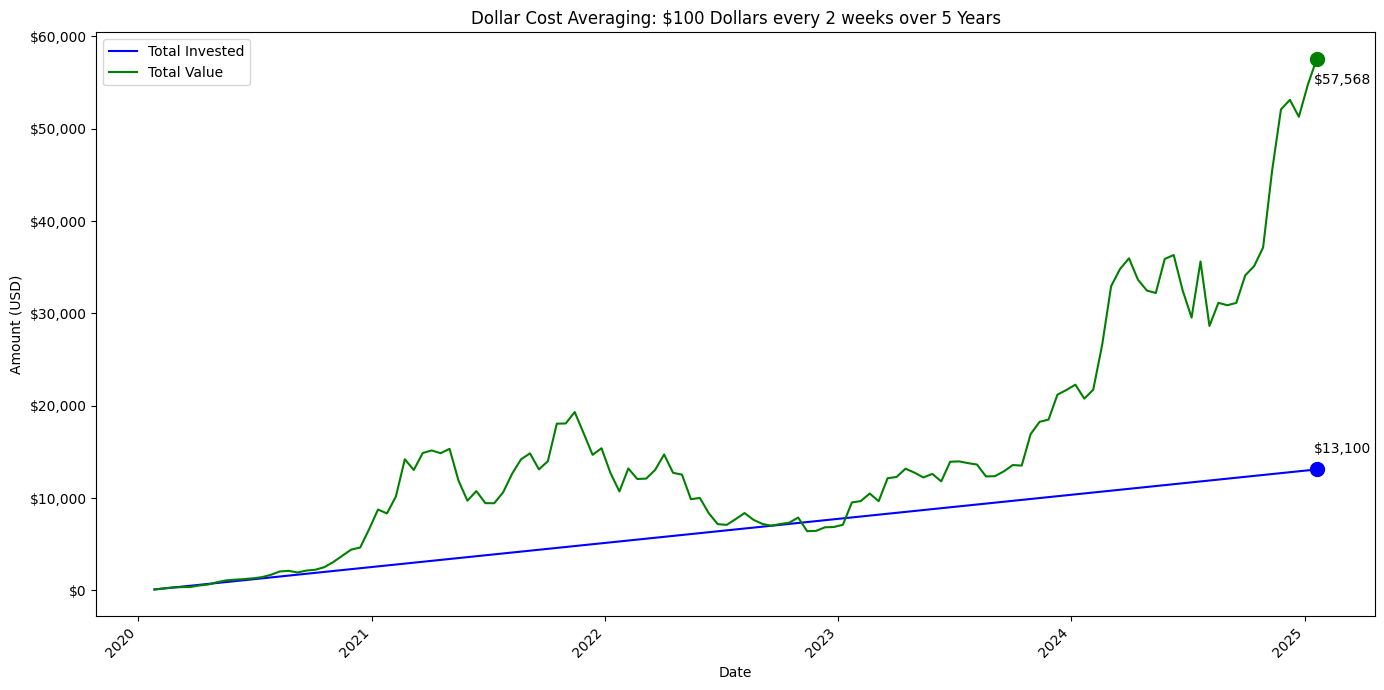

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your CSV file
df = pd.read_csv('5year-dca.csv')
df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' to datetime if not already

# Create the plot
plt.figure(figsize=(14, 7))

# Plot Total_Invested and Total_Value
plt.plot(df['Date'], df['Total_Invested'], label='Total Invested', color='blue')
plt.plot(df['Date'], df['Total_Value'], label='Total Value', color='green')

# Add labels and title
plt.title('Dollar Cost Averaging: $100 Dollars every 2 weeks over 5 Years')
plt.xlabel('Date')
plt.ylabel('Amount (USD)')
plt.legend()

# Format y-axis to show currency
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Rotate x-axis labels for better readability if dates are close together
plt.xticks(rotation=45, ha='right')

# Add markers and annotations at the end points
last_date = df['Date'].iloc[-1]
last_invested = df['Total_Invested'].iloc[-1]
last_value = df['Total_Value'].iloc[-1]

# Add markers
plt.plot(last_date, last_invested, 'bo', markersize=10)  # Blue dot for Total Invested
plt.plot(last_date, last_value, 'go', markersize=10)    # Green dot for Total Value

# Annotation for Total Invested
plt.annotate(f'${last_invested:,.0f}', 
             xy=(last_date, last_invested), 
             xytext=(-2, 10), textcoords='offset points',
             ha='left', va='bottom')

# Annotation for Total Value
plt.annotate(f'${last_value:,.0f}', 
             xy=(last_date, last_value), 
             xytext=(-2, -10), textcoords='offset points',
             ha='left', va='top')

# Adjust the plot layout
plt.tight_layout()
plt.show()